In [1]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from sklearn.decomposition import PCA
import configs

# Parameters

In [2]:
internal_dim = 16
generic_exp_name = 'postbug_gridworld8x8_shuffobs'
network_yaml = 'dm'

In [3]:
engram_dir = '/Volumes/aronov-locker/Ching/rl/'
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/' # Axon path
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
latents_dir = f'{engram_dir}latents/{exp_name}/'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

# Load analyses dataframes

In [4]:
with open(f'{analysis_dir}representation_df.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}transition_df.p', 'rb') as f:
    T_df = pickle.load(f)

# Make encoder receptive fields

In [5]:
np.unique(repr_df['model'])

array(['postbug_gridworld8x8_shuffobs_entro-1',
       'postbug_gridworld8x8_shuffobs_g0.25_-2_entro-2',
       'postbug_gridworld8x8_shuffobs_g0.5_-3_entro-2',
       'postbug_gridworld8x8_shuffobs_g0.8_-3_entro-2',
       'postbug_gridworld8x8_shuffobs_g0_-2_entro-1',
       'postbug_gridworld8x8_shuffobs_mf0',
       'postbug_gridworld8x8_shuffobs_noq_entro-1',
       'postbug_gridworld8x8_shuffobs_noq_g0_-2_entro-1',
       'postbug_gridworld8x8_shuffobs_noq_g0_-2_entro-2'], dtype=object)

In [6]:
model = f'{generic_exp_name}_noq_g0_-2_entro-1'

In [7]:
_df = repr_df[repr_df['model'] == model]
_df = _df[_df['iteration'] == 0]

In [8]:
latents = np.array(list(_df['latents']))
reducer = PCA()
transformed_latents = reducer.fit_transform(latents)

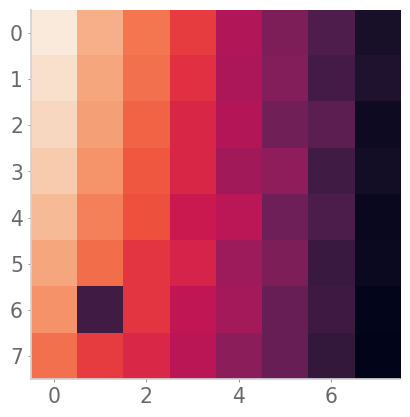

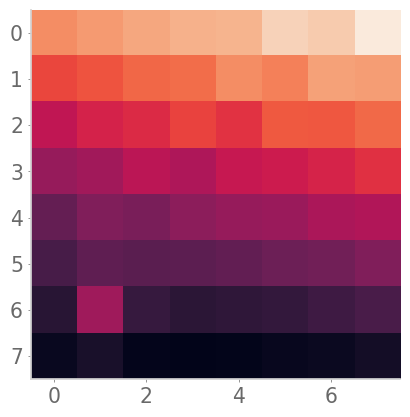

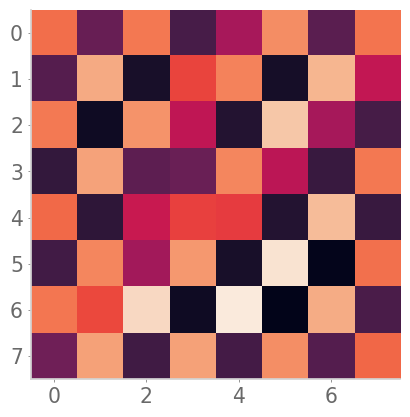

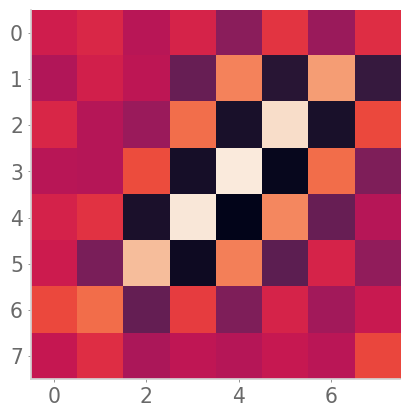

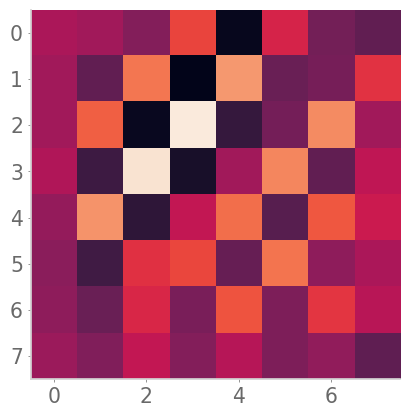

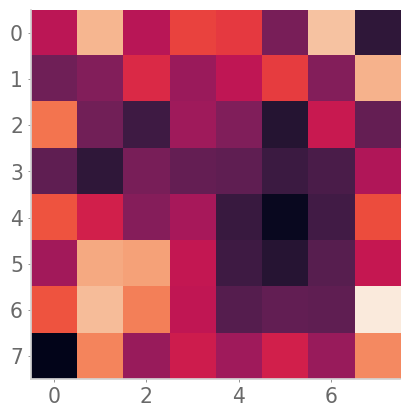

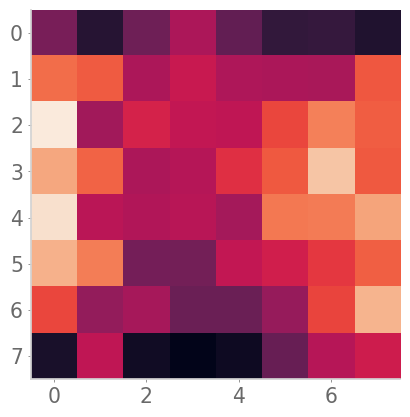

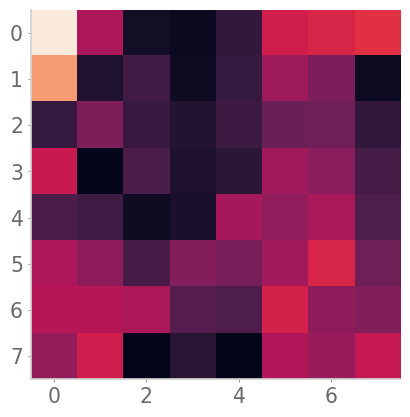

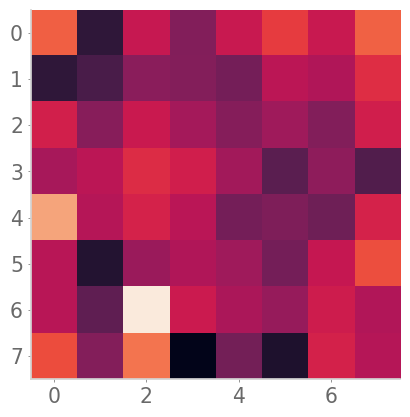

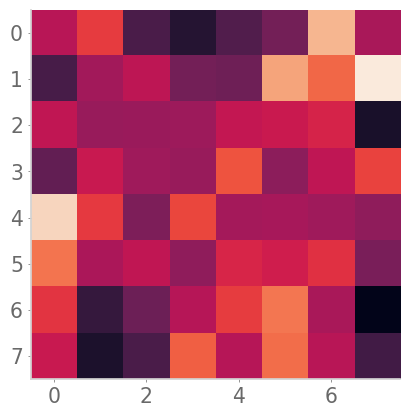

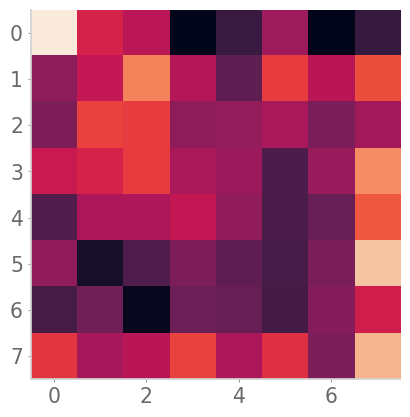

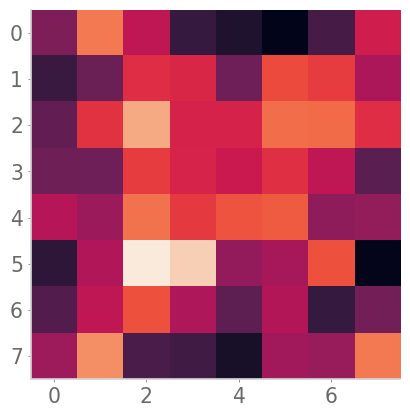

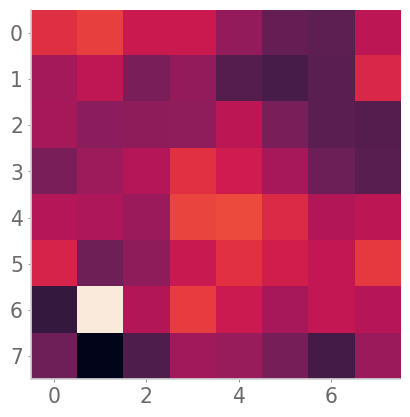

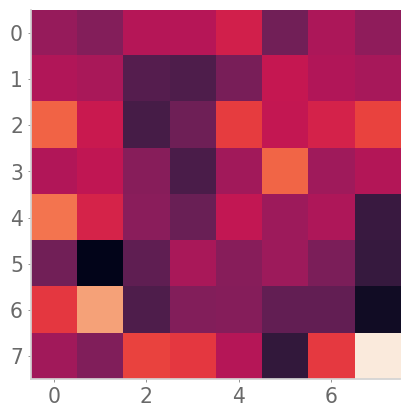

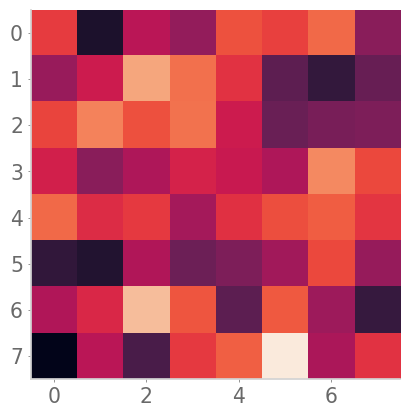

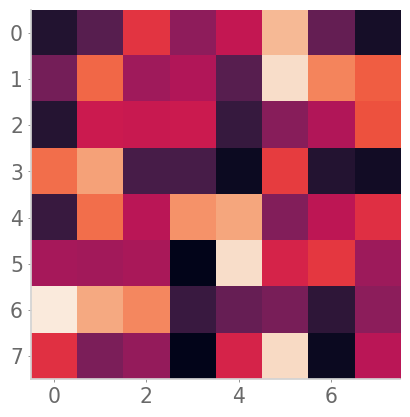

In [9]:
for k in range(reducer.n_components_):
    width = np.max(_df['x'])
    height = np.max(_df['y'])
    m = transformed_latents[:,k].reshape((width, height))
    plt.figure()
    plt.imshow(m)
    plt.show()

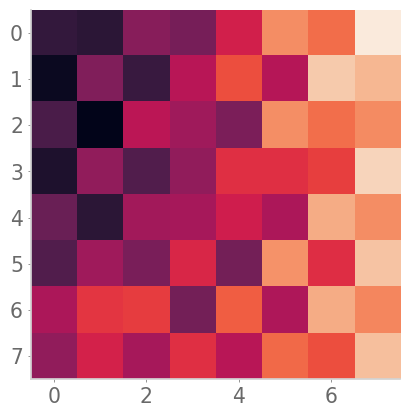

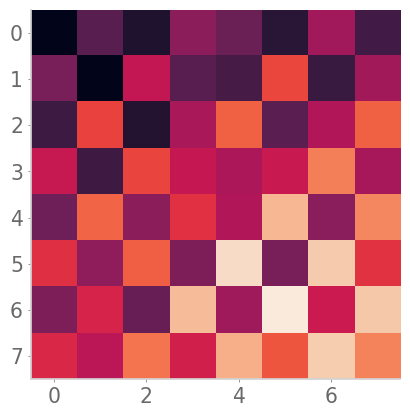

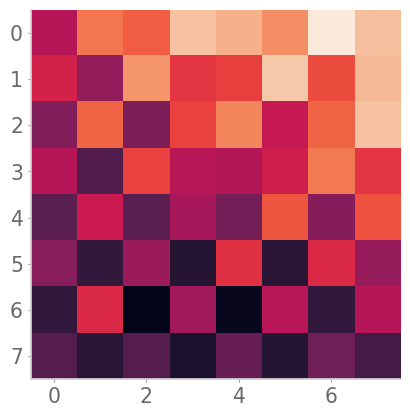

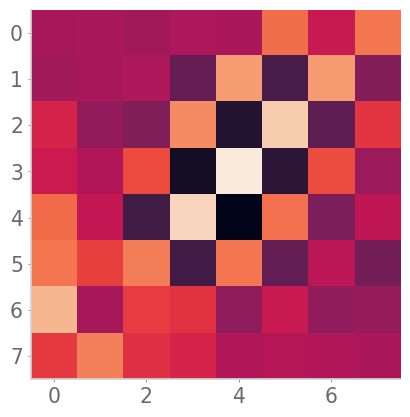

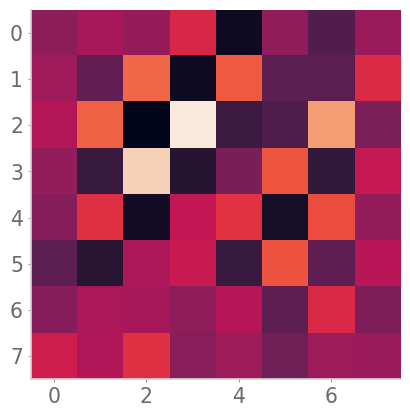

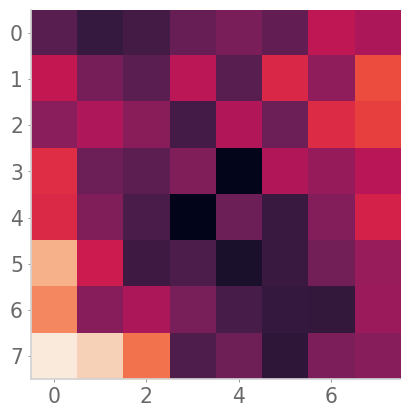

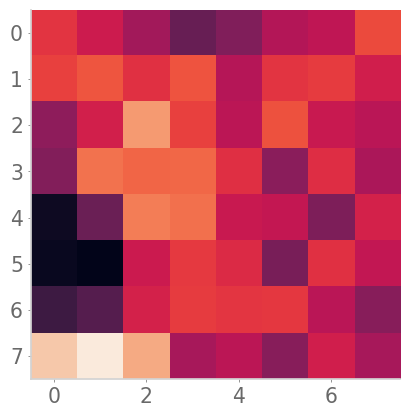

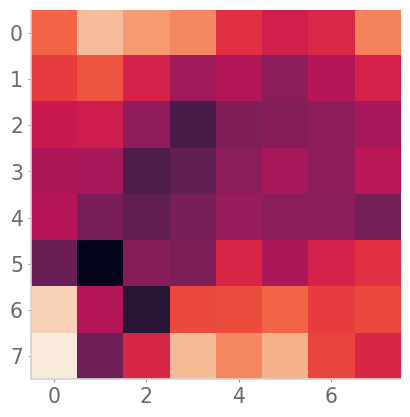

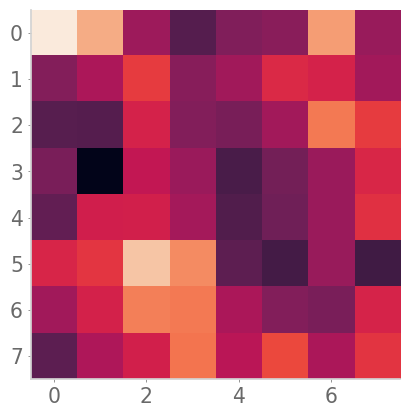

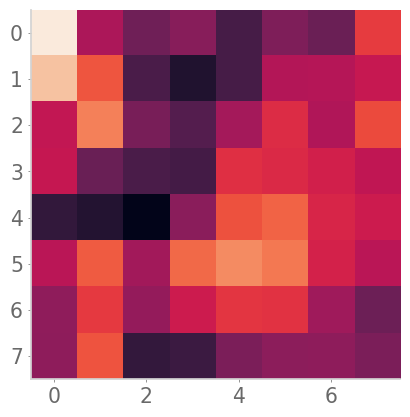

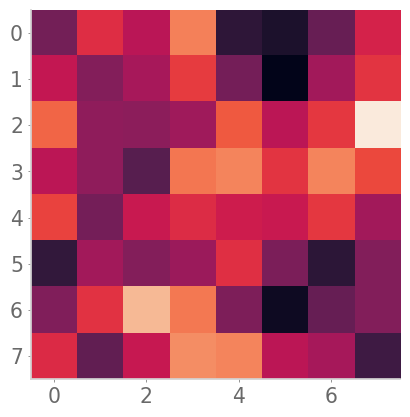

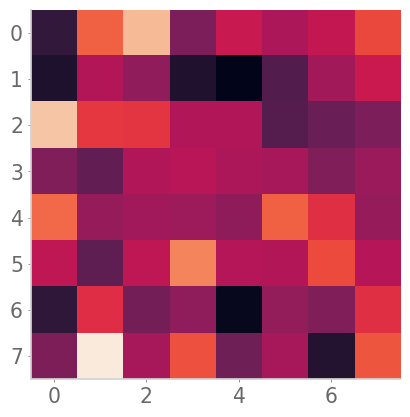

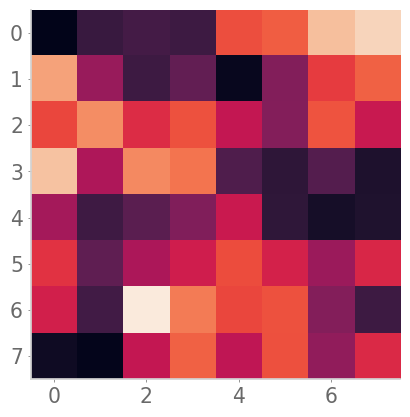

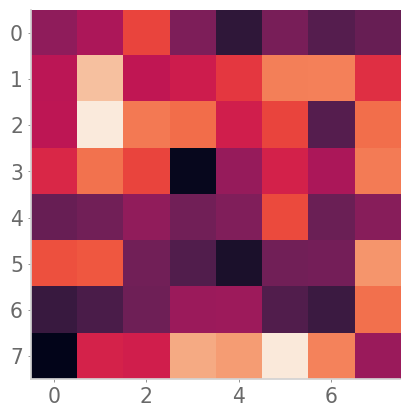

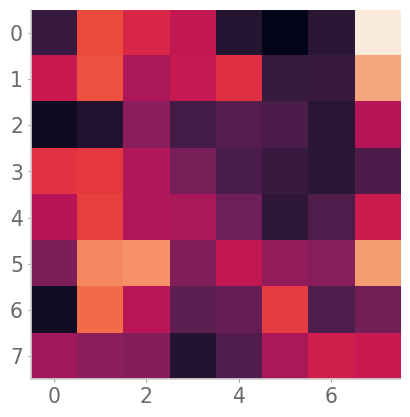

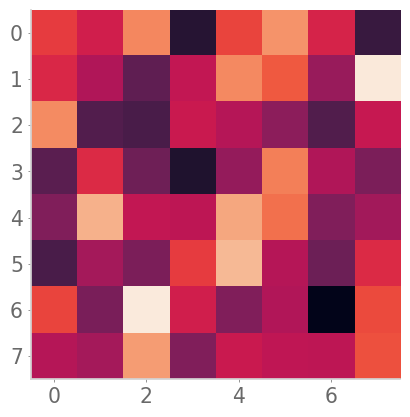

In [63]:
for k in range(reducer.n_components_):
    width = np.max(_df['x'])
    height = np.max(_df['y'])
    m = transformed_latents[:,k].reshape((width, height))
    plt.figure()
    plt.imshow(m)
    plt.show()